# Compare implementations performance of sequent files processing 

In [1]:
import os
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import platform

print(platform.platform())
print(platform.python_version())

macOS-13.5-x86_64-i386-64bit
3.11.5


In [3]:
# Create 10000 files with 256 KB data
os.makedirs('/tmp/imohash-test', exist_ok=True)
for i in range(10000):        
    with open(f'/tmp/imohash-test/file_{i}.txt', 'wb') as f:
        f.write(os.urandom(256 * 1024))  # 256 KB

## Functions for test

In [4]:
import imohash
import imohash_rs

hash_ = imohash_rs.Imohash()

def process_files_py(file_paths):    
    for file_path in file_paths:
        imohash.hashfile(file_path)
        
def process_files_rs(file_paths):
    for file_path in file_paths:
        hash_.get_for_file(path=file_path)

## Testing & metrics collecting

In [16]:
file_paths = [f'/tmp/imohash-test/file_{i}.txt' for i in range(10000)]

# Test with different sample sizes (files count)
sample_sizes = [100, 500, 1000, 2000, 5000, 8000, 10000]

result = {}
for i in ('initial', 'warmed'):
    time_py = []
    time_rs = []
    result[i] = (time_py, time_rs)
    
    for size in sample_sizes:
        sample = file_paths[:size]
    
        # py test
        start = time.time()
        process_files_py(sample)
        time_py.append(time.time() - start)
    
        # rs test
        start = time.time()
        process_files_rs(sample)
        time_rs.append(time.time() - start)

## Graphics rendering

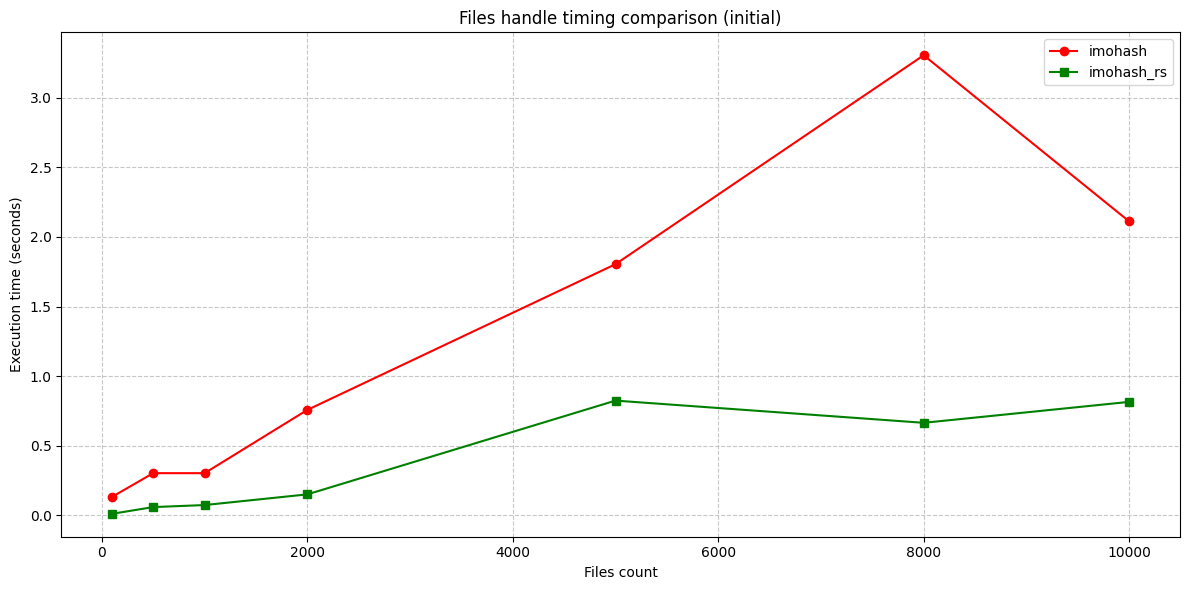

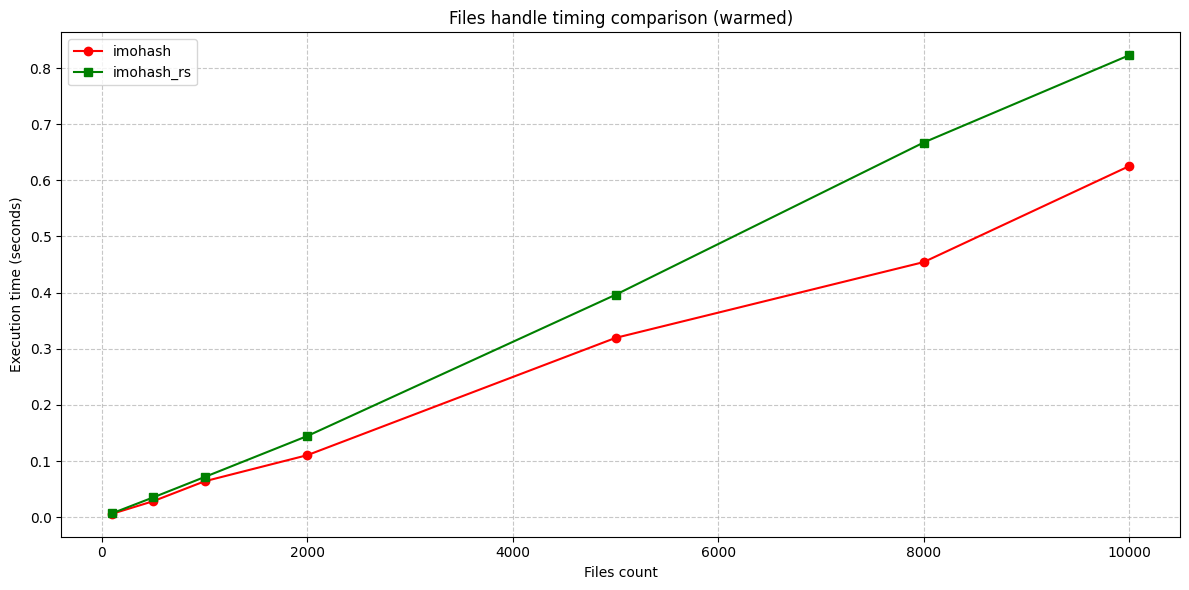

In [17]:
for i in ('initial', 'warmed'):
    time_py, time_rs = result[i]
    
    plt.figure(figsize=(12, 6))
    
    # py implementation function metering
    plt.plot(sample_sizes, time_py, label='imohash', marker='o', color='red')
    
    # rs implementation function metering
    plt.plot(sample_sizes, time_rs, label='imohash_rs', marker='s', color='green')
    
    # graphic configuration
    plt.title(f'Files handle timing comparison ({i})')
    plt.xlabel('Files count')
    plt.ylabel('Execution time (seconds)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    
    # save graphic
    plt.savefig(f'docs/_static/performance_comparison.{i}.svg', dpi=300)
    plt.show()

## Additional analyze (time per operation)

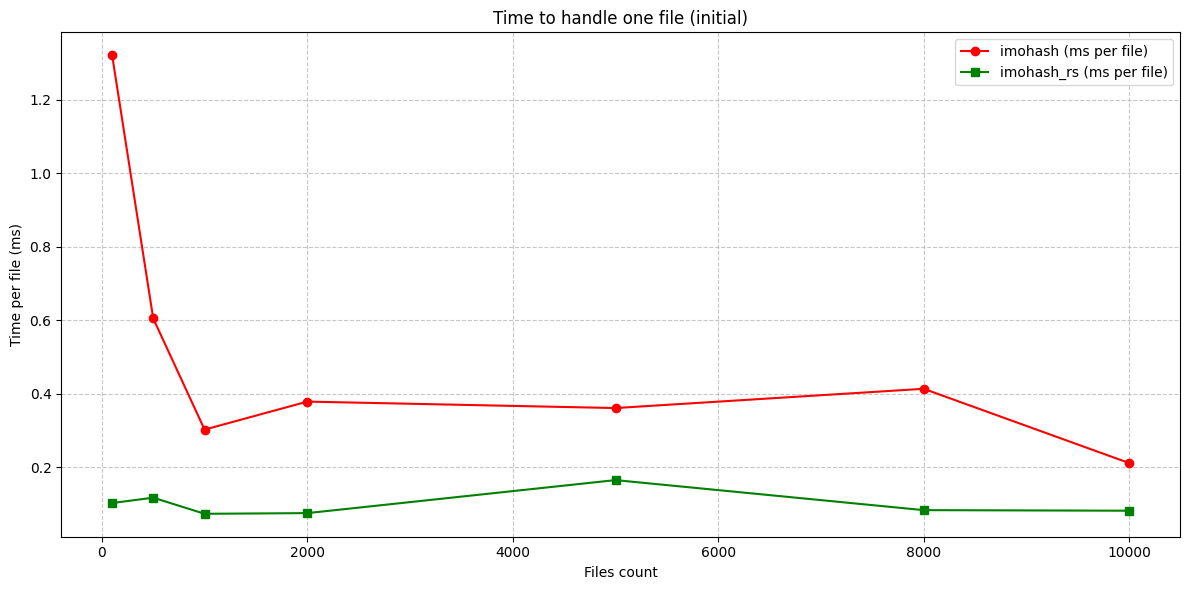

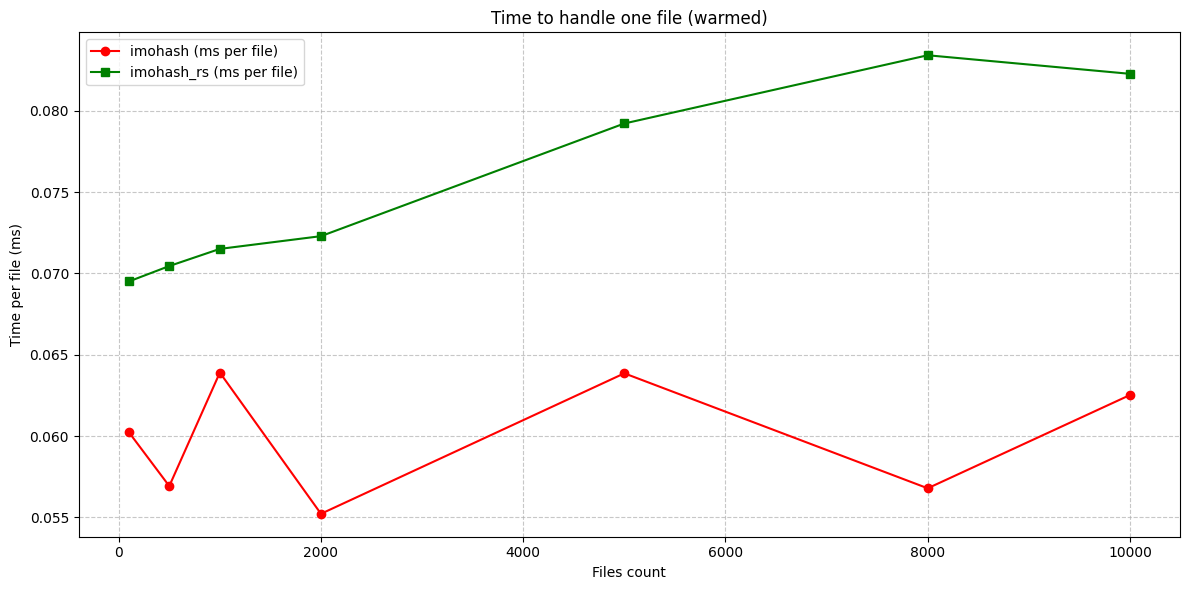

In [18]:
for i in ('initial', 'warmed'):
    time_py, time_rs = result[i]
    
    plt.figure(figsize=(12, 6))
    
    # Calculate time per one operation (file)
    time_per_op_py = np.array(time_py) / np.array(sample_sizes)
    time_per_op_rs = np.array(time_rs) / np.array(sample_sizes)
    
    plt.plot(sample_sizes, time_per_op_py * 1000,
             label='imohash (ms per file)',
             marker='o', color='red')
    plt.plot(sample_sizes, time_per_op_rs * 1000,
             label='imohash_rs (ms per file)',
             marker='s', color='green')
    
    plt.title(f'Time to handle one file ({i})')
    plt.xlabel('Files count')
    plt.ylabel('Time per file (ms)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'docs/_static/time_per_operation.{i}.svg', dpi=300)
    plt.show()

## Cleanup test files (optional)

In [ ]:
# Remove test files
import shutil
shutil.rmtree('/tmp/imohash-test')